Konrad Szwed projekt 0.7

Bibliografia:<br/>
https://dzone.com/articles/image-data-analysis-using-numpy-amp-opencv <br/>
https://plot.ly/matplotlib/



In [1]:
!conda --version

conda 4.6.14


In [2]:
import requests
import sys
import shutil
import re
import threading
from bs4 import BeautifulSoup as soup
import glob
import os
import numpy as np
import imageio
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import datetime
import csv
import time
from scipy.stats import norm
import pandas as pd
import skimage
import plotly.tools as tls
import plotly.plotly as py
import plotly 
import cv2
from skimage.color import rgb2hsv
#plotly.tools.set_credentials_file(username='roonie11lord', api_key='0atj1bcfny')
#import skimage.color

In [3]:
#uzywanie GPU do operacji
#import numba
#from numba import cuda
#from numba import autojit
#@cuda.jit

In [4]:
#Wymiary wykresów w matplotlib
plt.rcParams['figure.figsize'] = [15, 10]

In [9]:
#GLOBALNE ŚCIEŻKI DOSTĘPU
#WPISZ SCIEZKE DO FOLDERU W KTORYM ZBADAMY PLIKI GRAFICZNE (zostaw to r''' i ''' na końcu)
#domyślnie: \Users\rooni\Desktop\projekt_analiza_obrazu\baza
#########################################################################
#user_path=r'''C:\Users\rooni\Desktop\PHOTOSHOP'''
#user_path=r'''\Users\rooni\Desktop\projekt_analiza_obrazu\baza_test2'''
#user_path=r'''\Users\rooni\Desktop\projekt_analiza_obrazu\baza'''
#user_path=r'''\Users\rooni\Desktop\projekt_analiza_obrazu\baza_test'''
user_path=r'''./baza_web'''
#########################################################################
#stats_path=r'''C:\Users\rooni\Desktop\projekt_analiza_obrazu\stats'''
#stats_path=r'''C:\Users\KSzwed\repositories\projekt_analiza_obrazu\stats'''
stats_path = '''./stats'''
#########################################################################
#url = "https://www.uni.lodz.pl/"
url = "https://pixabay.com/pl/images/search/dog/"

In [10]:
def timeit(method):
    """Mierzy czas wykonania funkcji"""
 
    def check_time(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        log(method.__name__, args, kw, ts, te)
        return result
 
    def log(name, args, kw, time_start, time_end):
        #msg = '%r (%r, %r) %2.10f sec' % (name, args, kw, time_end - time_start)
        msg = '%r %2.10f sec' % (name, time_end - time_start)
        print (msg)
 
    check_time.__name__ = method.__name__
    return check_time

<h2>Pobieranie grafik ze strony</h2>

In [11]:
THREAD_COUNTER = 0
THREAD_MAX     = 5

def get_source( link ):
    r = requests.get( link )
    if r.status_code == 200:
        return soup( r.text )
    else:
        sys.exit( "[~] Invalid Response Received." )

def filter( html ):
    imgs = html.findAll( "img" )
    if imgs:
        return imgs
    else:
        sys.exit("[~] No images detected on the page.")

def requesthandle( link, name ):
    global THREAD_COUNTER
    global user_path
    THREAD_COUNTER += 1
    try:
        r = requests.get( link, stream=True )
        if r.status_code == 200:
            r.raw.decode_content = True
            f = open(os.path.join(user_path, name), "wb" )
            shutil.copyfileobj(r.raw, f)
            f.close()
            print ("[*] Downloaded Image: %s" % name)
    except (Exception, error):
        print ("[~] Error Occured with %s : %s" % (name, error))
    THREAD_COUNTER -= 1

def download_images(source):
    html = get_source( source )
    tags = filter( html )
    for tag in tags:
        src = tag.get( "src" )
        if src:
            src = re.match( r"((?:https?:\/\/.*)?\/(.*\.(?:png|jpg)))", src )
            if src:
                (link, name) = src.groups()
                if not link.startswith("http"):
                    link = source + link
                _t = threading.Thread( target=requesthandle, args=(link, name.split("/")[-1]) )
                _t.daemon = True
                _t.start()

                while THREAD_COUNTER >= THREAD_MAX:
                    pass

    while THREAD_COUNTER > 0:
        pass


In [45]:
#pobieranie grafik
download_images(url)

[*] Downloaded Image: dog-734689__340.jpg
[*] Downloaded Image: grilling-1081675__340.jpg
[*] Downloaded Image: wolf-2864647__340.jpg
[*] Downloaded Image: animals-1454214__340.png
[*] Downloaded Image: dog-734688__340.jpg
[*] Downloaded Image: yorkshire-terrier-790361__340.jpg
[*] Downloaded Image: dog-4132928__340.jpg
[*] Downloaded Image: yorkshire-terrier-790362__340.jpg
[*] Downloaded Image: dog-2871914__340.jpg
[*] Downloaded Image: bordeaux-869032__340.jpg
[*] Downloaded Image: laughs-2323344__340.jpg
[*] Downloaded Image: manipulation-4148376__340.jpg
[*] Downloaded Image: dog-3216207__340.png
[*] Downloaded Image: schnauzer-4154148__340.jpg
[*] Downloaded Image: dog-2832245__340.png
[*] Downloaded Image: rose-hip-10496__340.jpg


In [46]:
#pobieranie jpg,png,jpeg z folderu

@timeit
def pliki(user_path):
    path, dirs, files = next(os.walk(user_path))
    print("W folderze jest :", len(files) ,"plikow")
    count=len(files)
    files = [ fi for fi in files if fi.endswith(".jpg") or fi.endswith(".jpeg") or fi.endswith(".png")]
    file_count = len(files)
    print("W tym :", file_count ,"plików jpg, jpeg, png")
    print("W tym :", count-file_count ,"innych plików")
    return(files, file_count)

<h2>Ilość plików w podanej ścieżce</h2>

In [47]:
files,file_count=pliki(user_path)

W folderze jest : 16 plikow
W tym : 16 plików jpg, jpeg, png
W tym : 0 innych plików
'pliki' 0.0010232925 sec


In [48]:
#test konkretnego pliku, funkcje niżej przyjmują jako 
get_ipython().run_line_magic('matplotlib', 'inline')
@timeit
def test_img(file):
    pic = imageio.imread(file)
    plt.figure(figsize = (15,15))
    plt.imshow(pic)

    print('Type of the image: ' , type(pic))
    print('Shape of the image: {}'.format(pic.shape))
    print(f'Image Hight: {pic.shape[0]} pixels')
    print(f'Image Width: {pic.shape[1]} pixels')
    print('Dimension of Image: {}'.format(pic.ndim))
    print('Image size: {}'.format(pic.size))
    print('Maximum RGB value in this image: {}'.format(pic.max()))
    print('Minimum RGB value in this image: {}'.format(pic.min()))
    try:
        print('Value of only R channel: {}'.format(pic[ 100, 50, 0]))
        print('Value of only G channel: {}'.format(pic[ 100, 50, 1]))
        print('Value of only B channel: {}'.format(pic[ 100, 50, 2]))
    except IndexError:
        print("RGB canals error")

In [49]:
#@timeit
#@cuda.jit
def imgstats(file,index=0):
    pic = imageio.imread(user_path+'/{}'.format(file))
    img_stats=[]
    img_stats.append(index)
    img_stats.append(file)
    img_stats.append(type(pic))
    img_stats.append(pic.shape[0])
    img_stats.append(pic.shape[1])
    img_stats.append(pic.ndim)
    img_stats.append(pic.size)
    img_stats.append(pic.max())
    img_stats.append(pic.min())
    try:
        img_stats.append(pic[100, 50, 0])
        img_stats.append(pic[ 100, 50, 1])
        img_stats.append(pic[ 100, 50, 2])
    except IndexError:
        img_stats.append(0)
        img_stats.append(0)
        img_stats.append(0)
    return img_stats

In [50]:
#Grayscale
def grayscale(sciezka):
    original = imageio.imread(sciezka)
    grayscale = rgb2gray(original)

    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    ax = axes.ravel()

    ax[0].imshow(original)
    ax[0].set_title("Original")
    ax[1].imshow(grayscale, cmap=plt.cm.gray)
    ax[1].set_title("Grayscale")

    fig.tight_layout()
    plt.show()
    return grayscale

In [51]:
def hist_match(source, template):
    oldshape = source.shape
    source = source.ravel()
    template = template.ravel()

    # get the set of unique pixel values and their corresponding indices and
    # counts
    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True,
                                            return_counts=True)
    t_values, t_counts = np.unique(template, return_counts=True)

    # take the cumsum of the counts and normalize by the number of pixels to
    # get the empirical cumulative distribution functions for the source and
    # template images (maps pixel value --> quantile)
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]

    # interpolate linearly to find the pixel values in the template image
    # that correspond most closely to the quantiles in the source image
    interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)

    return interp_t_values[bin_idx].reshape(oldshape)

In [52]:
#HIGH VALUES OF RGB
def high_values(sciezka, value):
    #plt.rcParams['figure.figsize'] = [5, 5]
    # Only Red Pixel value , higher than value
    
    pic = imageio.imread(sciezka)
    red_mask = pic[:, :, 0] < value
    pic[red_mask] = 0
    plt.figure()
    plt.imshow(pic)
    plt.title("red pixel higher than {}".format(value))
    # Only Green Pixel value , higher than value
    
    pic = imageio.imread(sciezka)
    green_mask = pic[:, :, 1] < value
    pic[green_mask] = 0
    plt.figure()
    plt.imshow(pic)
    plt.title("green pixel higher than {}".format(value))
    # Only Blue Pixel value , higher than value
    
    pic = imageio.imread(sciezka)
    blue_mask = pic[:, :, 2] < value
    pic[blue_mask] = 0
    plt.figure()
    plt.imshow(pic)
    plt.title("blue pixel higher than {}".format(value))
    # Composite mask using logical_and
    
    pic = imageio.imread(sciezka)
    final_mask = np.logical_and(red_mask, green_mask, blue_mask)
    pic[final_mask] = 40
    plt.figure()
    plt.imshow(pic)
    plt.title("composite mask")
    
#high_values('lena.png',180)

In [53]:
Titles=['Index','File name','Type of the image','Image Height','Image Width','Dimension of Image','Image size','Maximum RGB','Minimum RGB','R channel','G channel','B channel','Baza wygenerowana przez Konrad Szwed dnia {} | Zawiera {} elementow'.format(datetime.datetime.today(),file_count)]

In [54]:
#test w razie problemow z konkretnym plikiem
#file=user_path+'\{}'.format(files[10])
#test_img(file)

In [55]:
#Sprawdzenie poprzedniego pliku ze statystykami
#path_oldstat='./stats/'


if not os.path.exists(stats_path):
    os.makedirs(stats_path)
    
@timeit
def check_stats(stats_path):
    path_oldstat=stats_path
    if os.path.isfile(path_oldstat+'stats.csv') :
        if os.path.isfile(path_oldstat+'old_stats.csv') :    
            os.unlink(path_oldstat+'old_stats.csv')
        os.rename(path_oldstat+'stats.csv', path_oldstat+'old_stats.csv')
        print('Utworzono backup poprzedniej bazy danych w folderze {},pod nazwą {}'.format(path_oldstat, os.listdir(path_oldstat)))
    

#Tworzenie csv 

@timeit
def make_csv_stats(stats_path, Titles, files, file_count):
    global i
    with open(stats_path+'/stats.csv', 'w') as csvfile:
        filewriter = csv.writer(csvfile, delimiter=',',
                                quotechar=' ', quoting=csv.QUOTE_MINIMAL)
        filewriter.writerow(Titles)
        #file_count ale do testow ustawcie mniejsza liczbe
        index=0
        for i in files:
            filewriter.writerow(imgstats(i,index))     
            index+=1

check_stats(stats_path)  
make_csv_stats(stats_path, Titles, files, file_count)


'check_stats' 0.0000000000 sec
'make_csv_stats' 0.0718338490 sec


In [56]:
print(files[0])
print(imgstats(files[0]))

animals-1454214__340.png
[0, 'animals-1454214__340.png', <class 'imageio.core.util.Array'>, 340, 471, 3, 640560, 255, 0, 0, 0, 0]


In [57]:
@timeit
def wyswietl(stats):
    return('Image Height:{:.2f}\n Image Width:{:.2f}\n Dimension of Image:{:.2f}\n Image size:{:.2f}Mb\n Maximum RGB:{:.2f}\n Minimum RGB:{:.2f}\n R channel:{:.2f}\n G channel:{:.2f}\n B channel:{:.2f}'.format(stats[0],stats[1],stats[2],stats[3]*pow(10,-6),stats[4],stats[5],stats[6],stats[7],stats[8]))

In [58]:
#tworzymy dane
#@cuda.jit
@timeit
def make_data_stats_from_links(files):
    dane=[]
    for i in files:
        dane.append(imgstats(i))
    return dane

dane=make_data_stats_from_links(files)
#print(dane)

'make_data_stats_from_links' 0.0798141956 sec


<h2>Średnie statystyki wszystkich plików w podanej ścieżce</h2>

In [59]:
#Statystyki uśrednione
#@cuda.jit
@timeit
def make_avg_from_data(data):
    avg=[0,0,0,0,0,0,0,0,0]

    for i in range(0,len(dane)):
        for x in range(3,12):
            #print(dane[i][x])
            avg[x-3]+=dane[i][x]
    for i in range(0,len(avg)):
        avg[i]=avg[i]/len(dane)
    return avg


In [60]:

avg=make_avg_from_data(dane)
print("Wyniki średnie:")    
print(wyswietl(avg))

'make_avg_from_data' 0.0000000000 sec
Wyniki średnie:
'wyswietl' 0.0000000000 sec
Image Height:340.00
 Image Width:504.19
 Dimension of Image:3.00
 Image size:0.54Mb
 Maximum RGB:253.44
 Minimum RGB:0.00
 R channel:123.62
 G channel:134.19
 B channel:120.25


wykres średnia z RGB channels


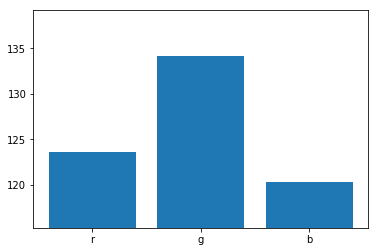

In [61]:
#wykresy

print("wykres średnia z RGB channels")
y = [avg[6],avg[7],avg[8]]
plt.bar(['r','g','b'],y)
plt.ylim(min(y)-5, max(y)+5)
plt.show()


<H2>Ilość wystąpień poszczególnych wartości RGB</H2>

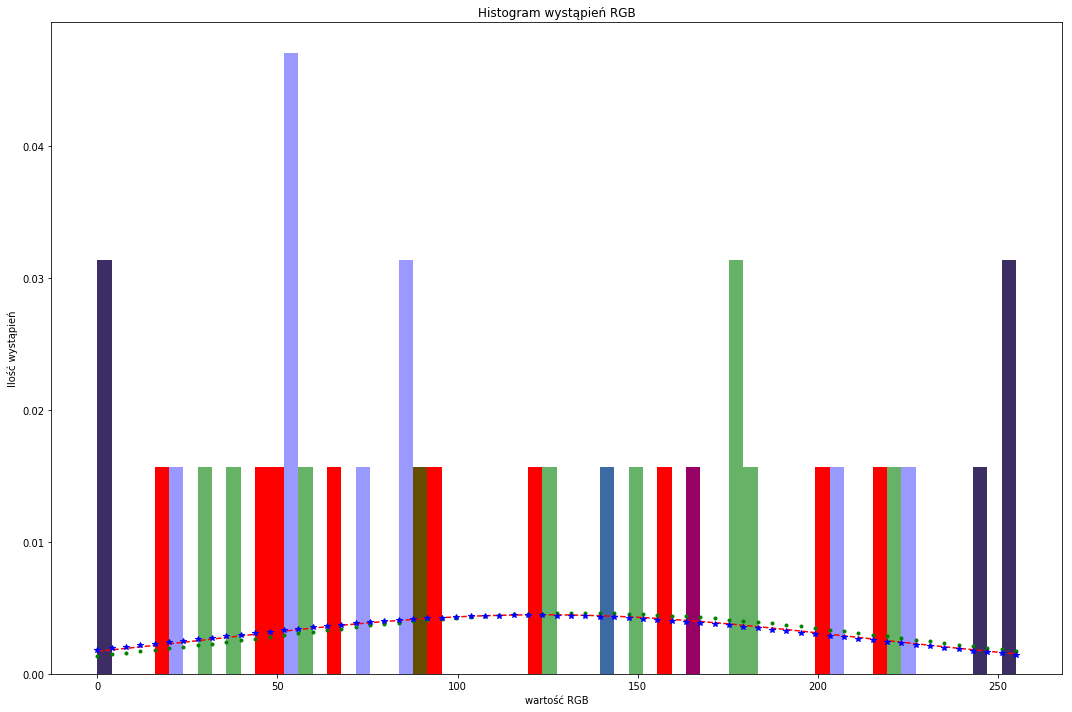

In [62]:
# create a figure and axis 
plt.rcParams['figure.figsize'] = [15, 10]
fig, ax = plt.subplots() 

t=[i for i in range(256)]
data1,data2,data3=[],[],[]
for i in range(0,len(dane)):
    data1.append(dane[i][9])
    data2.append(dane[i][10])
    data3.append(dane[i][11])

num_bins = 64 #ilosc slupkow    
# the histogram of the data
n, bins, patches = ax.hist(data1, num_bins, density=1, color='red',alpha = 1)
ax.hist(data2, num_bins, density=1, color='green',alpha = 0.6)
ax.hist(data3, num_bins, density=1, color='blue',alpha = 0.4)

# add a 'best fit' line red
(mu, sigma) = norm.fit(data1)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--', color="red")    

# add a 'best fit' line red
(mu, sigma) = norm.fit(data2)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '.', color="green")    

# add a 'best fit' line red
(mu, sigma) = norm.fit(data3)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '*', color="blue")    

ax.set_xlabel('wartość RGB')
ax.set_ylabel('Ilość wystąpień')
ax.set_title(r'Histogram wystąpień RGB')

#zapis grafu
plt.savefig('rgbavg.png')
plt.savefig('rgbavg.pdf')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()


<h2>Rozmiary grafik</h2>
<h3>Wysokość/szerokość i rozmiar</h3>

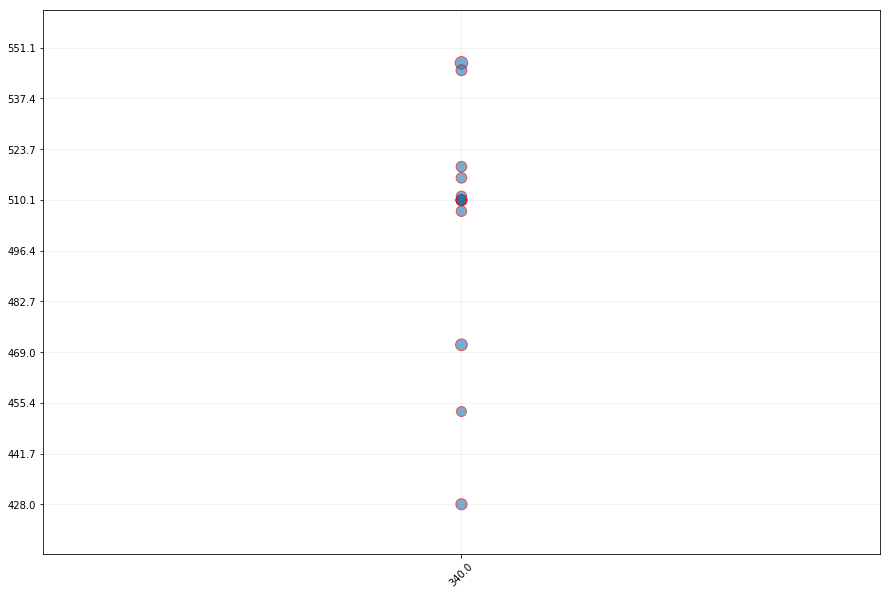

In [63]:
t=[i for i in range(256)]
datax,datay,datar=[],[],[]
for i in range(0,len(dane)):
    datax.append(dane[i][3])
    datay.append(dane[i][4])
    datar.append(dane[i][6])
plt.rcParams['figure.figsize'] = [15, 10]    
line = plt.figure()

plt.xticks(np.arange(min(datax), max(datax)+100, max(datax)/40), rotation=45)
plt.yticks(np.arange(min(datay), max(datay)+100, max(datay)/40), rotation=0)
#np.random.seed(5)

plt.grid(color='gray', alpha=0.1)
minimum=min(datar)
s = [n/minimum*100 for n in datar]
plt.scatter(datax,datay,s=s, alpha = 0.6, edgecolor='r')

<h2>Szukanie najbardziej podobnych grafik</h2>

In [64]:
import cv2

class CompareImage(object):

    def __init__(self, image_1_path, image_2_path):
        self.minimum_commutative_image_diff = 1
        self.image_1_path = image_1_path
        self.image_2_path = image_2_path

    def compare_image(self):
        image_1 = cv2.imread(self.image_1_path, 0)
        image_2 = cv2.imread(self.image_2_path, 0)
        commutative_image_diff = self.get_image_difference(image_1, image_2)

        if commutative_image_diff < self.minimum_commutative_image_diff:
            #print ("Matched")
            return commutative_image_diff
        return 10000
        
    @staticmethod
    def get_image_difference(image_1, image_2):
        first_image_hist = cv2.calcHist([image_1], [0], None, [256], [0, 256])
        second_image_hist = cv2.calcHist([image_2], [0], None, [256], [0, 256])

        img_hist_diff = cv2.compareHist(first_image_hist, second_image_hist, cv2.HISTCMP_BHATTACHARYYA)
        img_template_probability_match = cv2.matchTemplate(first_image_hist, second_image_hist, cv2.TM_CCOEFF_NORMED)[0][0]
        img_template_diff = 1 - img_template_probability_match

        # taking only 10% of histogram diff, since it's less accurate than template method
        commutative_image_diff = (img_hist_diff / 10) + img_template_diff
        return commutative_image_diff

#test
compare_image = CompareImage("lena.png","lena.png")
image_difference = compare_image.compare_image()
#jeśli obrazki nie są identyczne wynik będzie <0  (procentowym jeśli pomnożymy przez 100)
print (round(image_difference*100))


0.0


In [65]:
@timeit
def what_are_similar(files):

    length=len(files)  
    max_img_equal,x,y=0,0,0
    min_img_equal,x2,y2=100,0,0
    for i in range(0,length):
        #print(i) #licznik
        for n in range(i+1,length):
            test,test2=user_path+'\{}'.format(files[n]),user_path+'\{}'.format(files[i])
            compare_image = CompareImage(test,test2)
            image_difference = compare_image.compare_image()
            if(image_difference!=10000):
                if (max_img_equal<float(image_difference)):
                    max_img_equal,x,y=image_difference,i,n            
                if (min_img_equal>float(image_difference)):
                    min_img_equal,x2,y2=image_difference,i,n            
    print('Najwięcej: {} % niezgodności pomiedzy obrazkiem nr {} i {}'.format(max_img_equal*100, x, y  ))
    print('Najmniej: {} % niezgodności pomiedzy obrazkiem nr {} i {} \n '.format(min_img_equal*100, x2, y2  ))
    return x,y,x2,y2


x,y,x2,y2=what_are_similar(files)

Najwięcej: 99.66736352469654 % niezgodności pomiedzy obrazkiem nr 1 i 8
Najmniej: 1.7523920179612833 % niezgodności pomiedzy obrazkiem nr 7 i 15 
 
'what_are_similar' 0.4051618576 sec


Najbardziej podobne grafiki
dog-734689__340.jpg


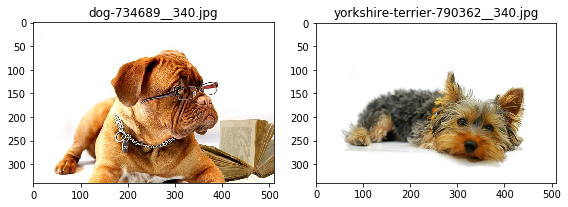

In [66]:
print('Najbardziej podobne grafiki')
path='{}\{}'.format(user_path,files[x2])
first = imageio.imread(path)
path=user_path+'\{}'.format(files[y2])
second = imageio.imread(path)


fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
print(files[x2])
ax[0].imshow(first)
ax[0].set_title(files[x2])
ax[1].imshow(second)
ax[1].set_title(files[y2])

fig.tight_layout()
plt.show()

Najmniej podobne grafiki


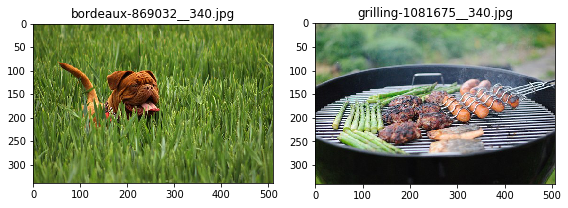

In [67]:
print('Najmniej podobne grafiki')
path='{}\{}'.format(user_path,files[x])
first = imageio.imread(path)
path=user_path+'\{}'.format(files[y])
second = imageio.imread(path)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(first)
ax[0].set_title(files[x])
ax[1].imshow(second)
ax[1].set_title(files[y])

fig.tight_layout()
plt.show()

<h2>Gray Scale</h2>

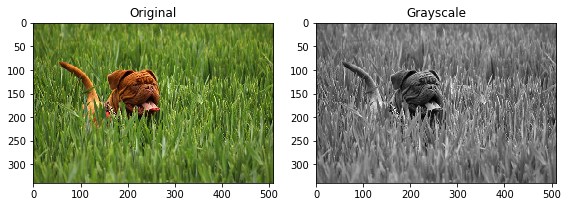

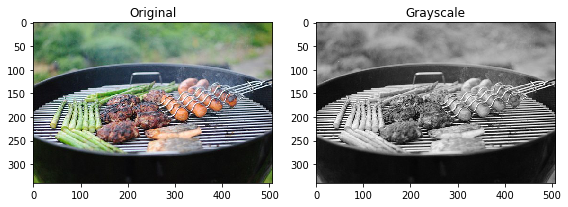

In [68]:
from skimage.color import rgb2gray
#test szarości najmniej podobnych grafik
gray=grayscale(user_path+'\{}'.format(files[x]))
gray2=grayscale(user_path+'\{}'.format(files[y]))

Type of the image:  <class 'imageio.core.util.Array'>
Shape of the image: (340, 510, 3)
Image Hight: 340 pixels
Image Width: 510 pixels
Dimension of Image: 3
Image size: 520200
Maximum RGB value in this image: 255
Minimum RGB value in this image: 0
Value of only R channel: 93
Value of only G channel: 125
Value of only B channel: 52
'test_img' 0.0339088440 sec


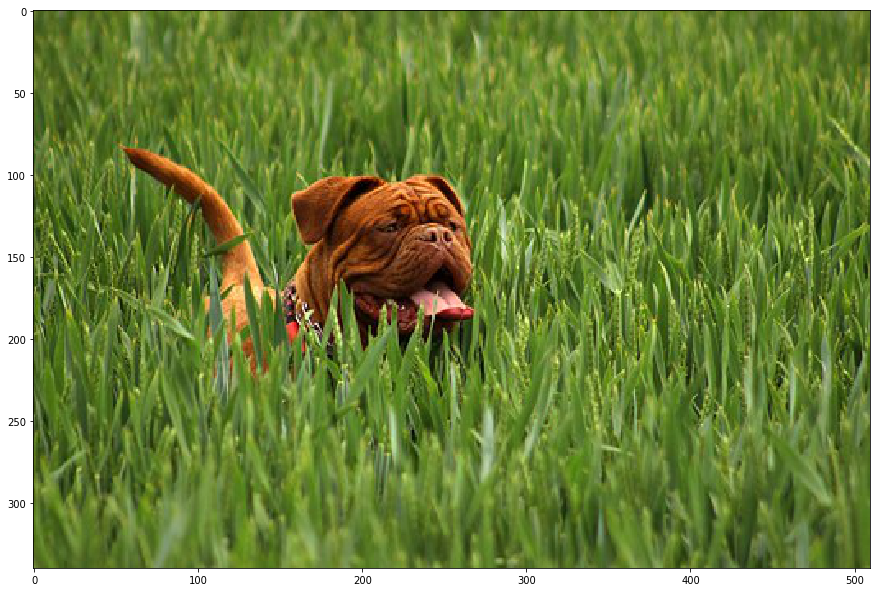

In [69]:
#teścik obrazka
test_img(user_path+'\{}'.format(files[x]))

<h2>Progowanie obrazu za pomocą barwy i ustalonej granicy kanału</h2>
<a>https://en.wikipedia.org/wiki/Thresholding_(image_processing)</a>

In [70]:
#USTAW GRANICĘ (średnio 0-0.12)
hue_threshold=0.11

In [71]:
#RGB to HSV
def rgb_hsv(sciezka, hue_threshold = 0):
    rgb_img = imageio.imread(sciezka)
    hsv_img = rgb2hsv(rgb_img)
    hue_img = hsv_img[:, :, 0]
    value_img = hsv_img[:, :, 2]
    
    fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(15, 10))

    ax0.imshow(rgb_img)
    ax0.set_title("RGB image")
    ax0.axis('off')
    ax1.imshow(hue_img, cmap='hsv')
    ax1.set_title("Hue channel")
    ax1.axis('off')
    ax2.imshow(value_img)
    ax2.set_title("Value channel")
    ax2.axis('off')

    fig.tight_layout()
    
    #hue_threshold = 0.04

    binary_img = hue_img > hue_threshold

    fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(15, 5))

    ax0.hist(hue_img.ravel(), 512)
    ax0.set_title("Histogram of the Hue channel with threshold")
    ax0.axvline(x=hue_threshold, color='r', linestyle='dashed', linewidth=2)
    ax0.set_xbound(0, 0.12)
    ax1.imshow(binary_img)
    ax1.set_title("Hue-thresholded image")
    ax1.axis('off')

    fig.tight_layout()

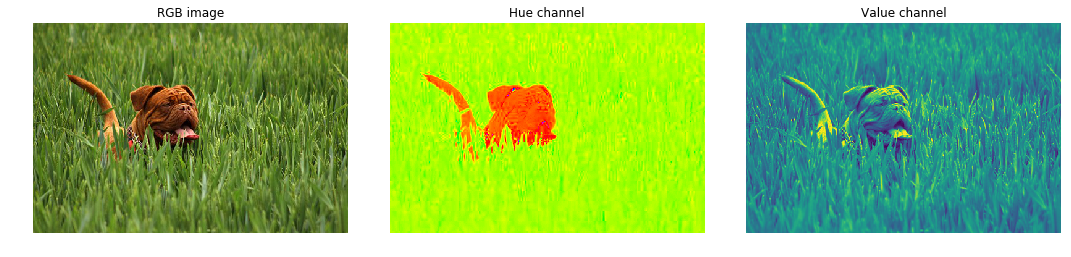

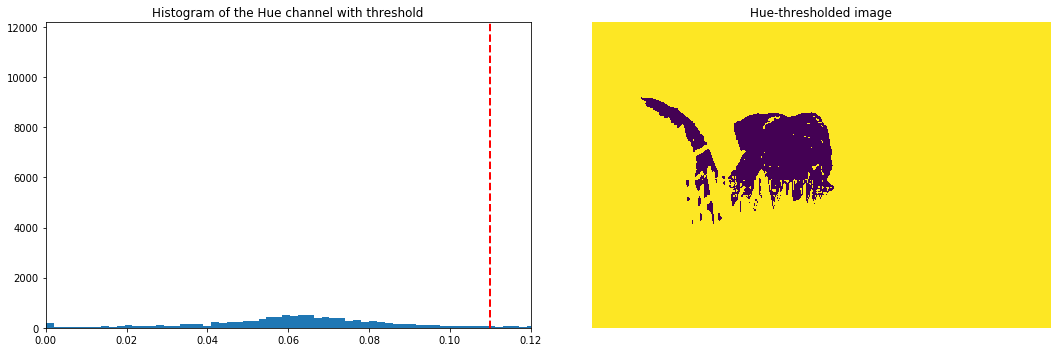

In [72]:
test=user_path+'\{}'.format(files[x])
rgb_hsv(test,hue_threshold)

<h2>Progowanie obrazu za pomocą wartości z ustaloną granicą kanału</h2>

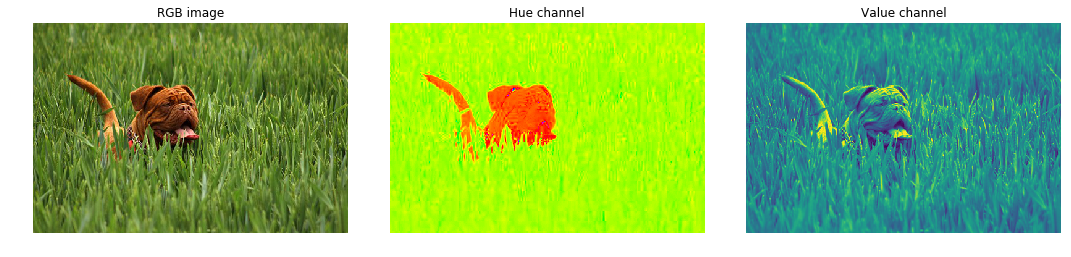

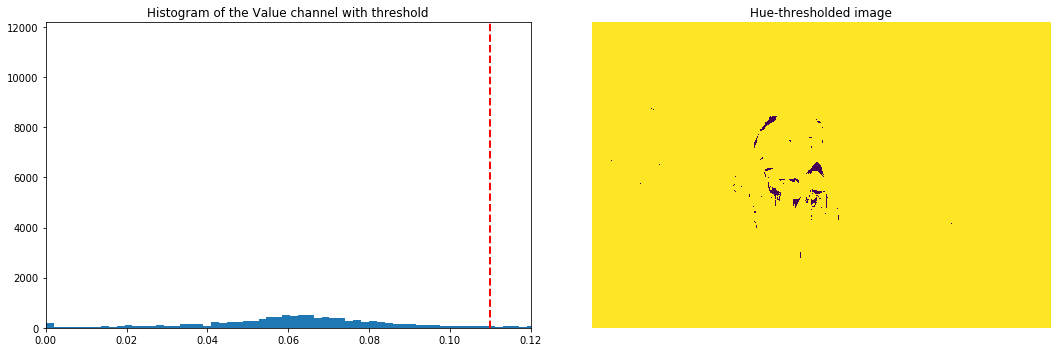

In [73]:
def rgb_hsv_value(sciezka, hue_threshold = 0):
    rgb_img = imageio.imread(sciezka)
    hsv_img = rgb2hsv(rgb_img)
    hue_img = hsv_img[:, :, 0]
    value_img = hsv_img[:, :, 2]
    
    fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(15, 10))

    ax0.imshow(rgb_img)
    ax0.set_title("RGB image")
    ax0.axis('off')
    ax1.imshow(hue_img, cmap='hsv')
    ax1.set_title("Hue channel")
    ax1.axis('off')
    ax2.imshow(value_img)
    ax2.set_title("Value channel")
    ax2.axis('off')

    fig.tight_layout()
    
    #hue_threshold = 0.04

    binary_img = value_img > hue_threshold

    fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(15, 5))

    ax0.hist(hue_img.ravel(), 512)
    ax0.set_title("Histogram of the Value channel with threshold")
    ax0.axvline(x=hue_threshold, color='r', linestyle='dashed', linewidth=2)
    ax0.set_xbound(0, 0.12)
    ax1.imshow(binary_img)
    ax1.set_title("Hue-thresholded image")
    ax1.axis('off')

    fig.tight_layout()
    
test=user_path+'\{}'.format(files[x])
rgb_hsv_value(test,hue_threshold)

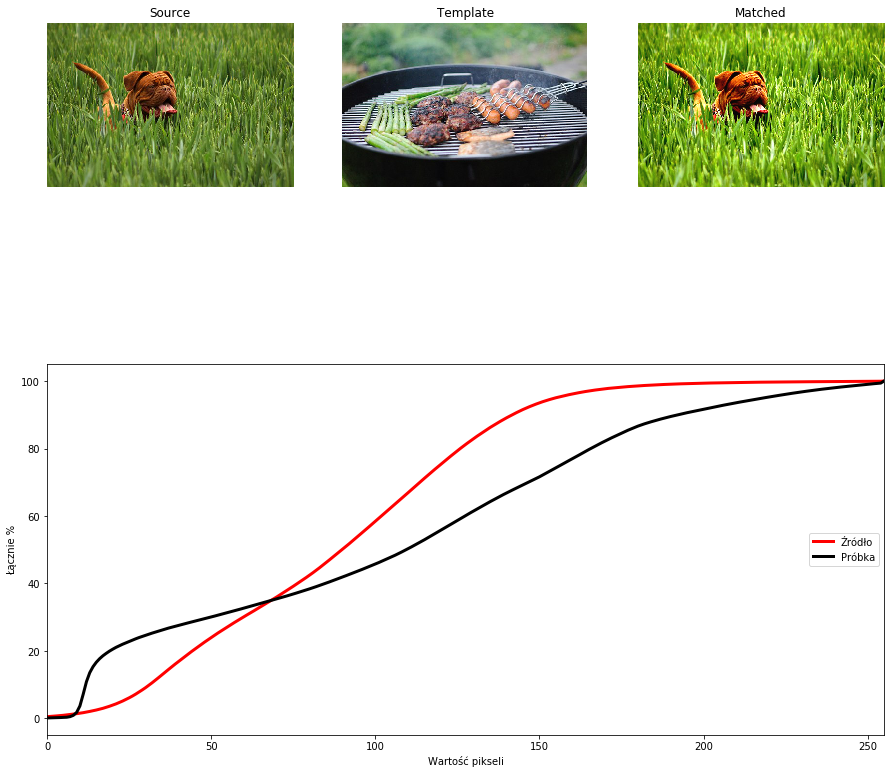

In [74]:
plt.rcParams['figure.figsize'] = [15,15]   

source2,template2=user_path+'\{}'.format(files[x]), user_path+'\{}'.format(files[y])
source=imageio.imread(source2)
template=imageio.imread(template2)
matched = hist_match(source, template)

def ecdf(x):
    vals, counts = np.unique(x, return_counts=True)
    ecdf = np.cumsum(counts).astype(np.float64)
    ecdf /= ecdf[-1]
    return vals, ecdf


x1, y1 = ecdf(source.ravel())
x2, y2 = ecdf(template.ravel())
x3, y3 = ecdf(matched.ravel())

fig = plt.figure()
 
gs = plt.GridSpec(2, 3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1], sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(gs[0, 2], sharex=ax1, sharey=ax1)
ax4 = fig.add_subplot(gs[1, :])
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()
# plt.imshow((out * 255).astype(np.uint8)) lub /255 do naprawy buga matplotlib
#ax1.imshow((source * 255).astype(np.uint8), cmap=plt.cm.gray)
ax1.imshow(source/255, cmap=plt.cm.gray)
ax1.set_title('Source')
ax2.imshow(template/255, cmap=plt.cm.gray)
ax2.set_title('Template')
ax3.imshow(matched/255, cmap=plt.cm.gray)
ax3.set_title('Matched')

ax4.plot(x1, y1 * 100, '-r', lw=3, label='Źródło')
ax4.plot(x2, y2 * 100, '-k', lw=3, label='Próbka')
#ax4.plot(x3, y3 * 100, '--r', color='g', lw=3, label='Pasujące piksele')
ax4.set_xlim(x1[0], x1[-1])
ax4.set_xlabel('Wartość pikseli')
ax4.set_ylabel('Łącznie %')
ax4.legend(loc=5)

<h2>Wyciąganie RGB powyżej określonej wartości i nałożenie maski kompozytowej</h2>

In [75]:
#ustal wartość graniczną
highest_value=160

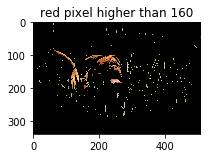

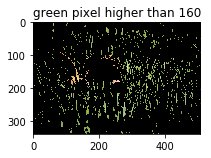

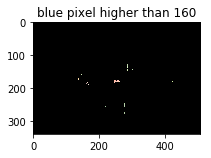

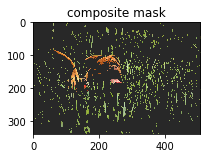

In [76]:
plt.rcParams['figure.figsize'] = [3,3]    
high_values(user_path+'\{}'.format(files[x]),highest_value)

<h2>Czyszczenie folderu, plików, zmiennych</h2>

In [77]:
for i in range(len(files)):
    try:
        os.remove(user_path+'/{}'.format(files[i]))
    except FileNotFoundError:
        print('folder obrazów jest pusty')
        break